In [1]:
from ConvergenceAnalysis import *


In [2]:
fd_data

,Molecule,FD
0,He,1.322234
1,Be,45.616381
2,Ne,2.376747
3,Mg,81.593730
4,Ar,10.758002
5,N2,15.030438
6,F2,14.642223
7,NaCl,28.700184
8,LiCl,24.532474
9,CO,14.466840


In [3]:
def process_data(base_path):
    base_high = base_path.joinpath('high-high')
    base_low = base_path.joinpath('low-low')

    mols = fd_data['Molecule'].to_list()
    low_data = get_database_residuals_z(mols, base_low)
    high_data = get_database_residuals_z(mols, base_high)
    # add column to low_data and high_data indicating low or high called ground state
    low_data['Ground Protocol'] = 'Medium'
    high_data['Ground Protocol'] = 'High'
    # combine dataframe
    data = pd.concat([low_data, high_data])

    # concatenate the protocol and ground state columns to make a new column
    data['Response Protocol'] = data['Protocol'].astype(str)
    # if protocol is 'High' or 'Low' then set it to 'H' or 'L' 
    data.loc[data['Response Protocol'] == 'High', 'Protocol'] = 'High'
    data.loc[data['Response Protocol'] == 'Medium', 'Protocol'] = 'Medium'
    data.loc[data['Response Protocol'] == 'Low', 'Protocol'] = 'Low'
    return data



In [4]:

october_absolute_path = Path('/mnt/data/madness_data/october_absolute/')
october_absolute_kain_path = Path('/mnt/data/madness_data/october_absolute_kain/')
fd_compare2 = Path('/mnt/data/madness_data/fd_compare2/')
fd_compare_data = process_data(fd_compare2)
absolute_kain_data = process_data(october_absolute_kain_path)
absolute_data = process_data(october_absolute_path)

paper_path = Path('/home/adrianhurtado/projects/writing/mra-tdhf-polarizability/Figures_v2')



He
He /mnt/data/madness_data/fd_compare2/low-low/hf/He/dipole_hf_0-000000/response_base.json
He /mnt/data/madness_data/fd_compare2/low-low/hf/He/dipole_hf_0-395340/response_base.json
/mnt/data/madness_data/fd_compare2/low-low/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/fd_compare2/low-low/hf/He/beta.json'
Be
Be /mnt/data/madness_data/fd_compare2/low-low/hf/Be/dipole_hf_0-000000/response_base.json
Be /mnt/data/madness_data/fd_compare2/low-low/hf/Be/dipole_hf_0-088930/response_base.json
/mnt/data/madness_data/fd_compare2/low-low/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/fd_compare2/low-low/hf/Be/beta.json'
Ne
Ne /mnt/data/madness_data/fd_compare2/low-low/hf/Ne/dipole_hf_0-000000/response_base.json
Ne /mnt/data/madness_data/fd_compare2/low-low/hf/Ne/dipole_hf_0-368977/response_base.json
/mnt/data/madness_data/fd_compare2/low-low/hf/Ne/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/fd_compare2/low-l

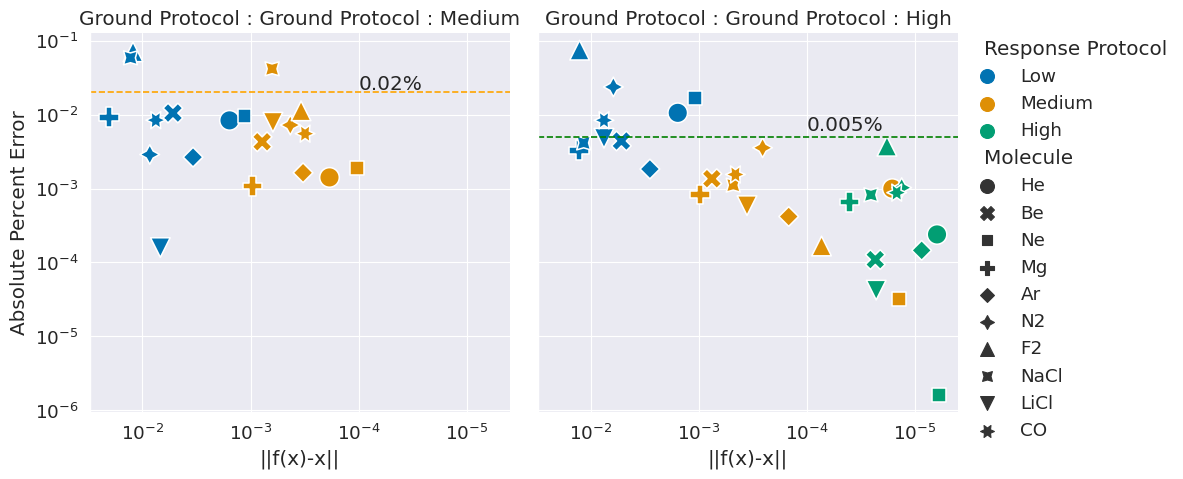

In [5]:
data = fd_compare_data
data = absolute_data
data = absolute_kain_data

sns.set_context("paper", font_scale=1.50)
sns.set_style("darkgrid")
sns.set_palette("colorblind")
style = 'Molecule'
hue = 'Response Protocol'
s = 200
x = 'Absolute Residual Z'
g = sns.relplot(x=x, y='Absolute Percent Error', data=data, style=style, hue=hue, s=s,
                col='Ground Protocol')
# set the subplot titles to Ground Protocol = H or M
g.set_titles(col_template="Ground Protocol : {col_name}")
# increase the font of the legend

for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.set_yscale('log')
    # write an annotation indicating the green line is .005
    # only on first left plot
    if ax == g.axes.flat[0]:
        ax.axhline(.02, ls='--', color='orange')
        ax.annotate('0.02%', xy=(1e-4, .02), xytext=(1e-4, .022))
    else:
        ax.axhline(.005, ls='--', color='green')
        ax.annotate('0.005%', xy=(1e-4, .005), xytext=(1e-4, .006))
        
# Draw a y=x line on each plot
for ax in g.axes.flat:
    ax.set_xlabel('||f(x)-x||')
    # y label is percent error of static polarizability
    ax.set_title('Ground Protocol : {}'.format(ax.get_title()))

g.fig.gca().invert_xaxis()
# Change the marker size in the legend to be larger and more legible
for lh in g.legend.legend_handles: 
    lh._sizes = [100]
# save a high res version
#g.savefig(paper_path.joinpath('mra_convergence.png'),dpi=600)


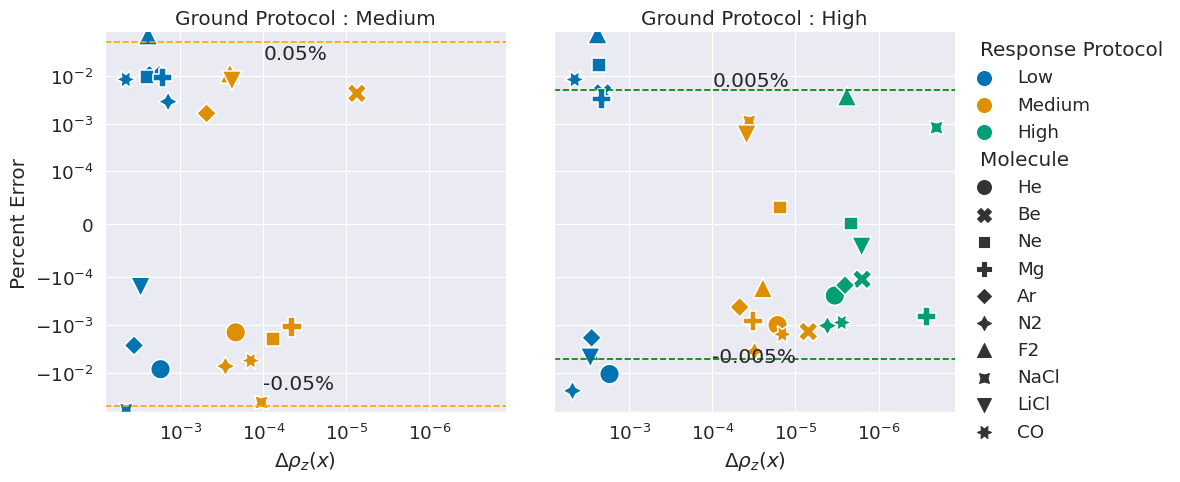

In [6]:
data = fd_compare_data
data = absolute_data
data = absolute_kain_data

sns.set_context("paper", font_scale=1.50)
sns.set_style("darkgrid")
sns.set_palette("colorblind")
style = 'Molecule'
hue = 'Response Protocol'
s = 200
x = 'dz'
g = sns.relplot(x=x, y='Percent Error', data=data, style=style, hue=hue, s=s,
                col='Ground Protocol')
# set the subplot titles to Ground Protocol = H or M
g.set_titles(col_template="Ground Protocol : {col_name}")
# increase the font of the legend

for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.set_yscale('symlog', linthresh=1e-4)
    # write an annotation indicating the green line is .005
    # only on first left plot
    if ax == g.axes.flat[0]:
        ax.axhline(.05, ls='--', color='orange')
        ax.axhline(-.05, ls='--', color='orange')
        ax.annotate('0.05%', xy=(1e-4, .02), xytext=(1e-4, .022))
        ax.annotate('-0.05%', xy=(1e-4, -.02), xytext=(1e-4, -.022))
    else:
        ax.axhline(.005, ls='--', color='green')
        ax.axhline(-.005, ls='--', color='green')
        ax.annotate('0.005%', xy=(1e-4, .005), xytext=(1e-4, .006))
        ax.annotate('-0.005%', xy=(1e-4, -.005), xytext=(1e-4, -.006))

# Draw a y=x line on each plot
for ax in g.axes.flat:
    ax.set_xlabel(r'$\Delta \rho_{z}(x)$')
    # y label is percent error of static polarizability

g.fig.gca().invert_xaxis()
# Change the marker size in the legend to be larger and more legible
for lh in g.legend.legend_handles:
    lh._sizes = [100]


In [7]:
data.query('Protocol=="Medium" and Molecule=="NaCl"')
     
 

,Protocol,rz,dz,znorm,MRA,FD,Percent Error,Absolute Percent Error,Absolute Residual Z,Molecule,Ground Protocol,Response Protocol
15,Medium,0.000313,0.000105,2.021725,28.688234,28.700184,-0.041639,0.041639,0.000632,NaCl,Medium,Medium
22,Medium,0.000238,0.000036,2.022146,28.700503,28.700184,0.001110,0.001110,0.000480,NaCl,High,Medium


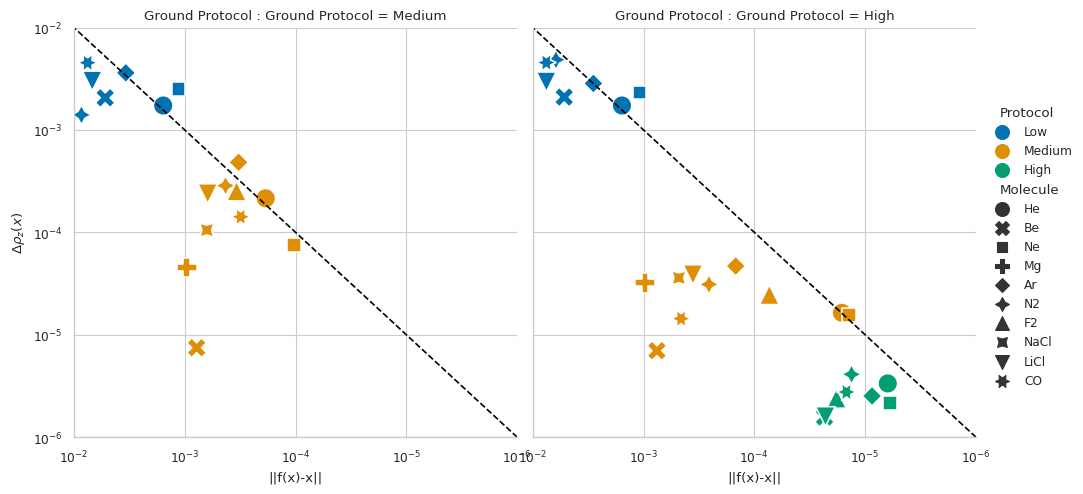

In [8]:


sns.set_context("paper", font_scale=1)
sns.set_style("whitegrid")
sns.set_palette("colorblind")
style = 'Molecule'
hue = 'Protocol'
s = 200
x = 'dz'
y = 'Absolute Residual Z'

g = sns.relplot(x=y, y=x, data=data, hue=hue,style=style, s=s,
                col='Ground Protocol')

for ax in g.axes.flat:
    ax.set_yscale('log')
    ax.set_xscale('log')
# Change the marker size in the legend to be larger and more legible
for lh in g.legend.legend_handles:
    lh._sizes = [100]
    
# draw a y=x line on each plot

for ax in g.axes.flat:
    ax.plot([1e-6,1e-2],[1e-6,1e-2], ls='--', color='black')
    ax.set_xlim(1e-6,1e-2)
    ax.set_ylim(1e-6,1e-2)
    ax.set_xlabel('||f(x)-x||')
    ax.set_ylabel(r'$\Delta \rho_{z}(x)$')
    ax.set_title('Ground Protocol : {}'.format(ax.get_title()))

g.fig.gca().invert_xaxis()



In [9]:

mols=data.Molecule.unique().tolist()


In [10]:
from DataAnalysisClass import *
single = ['aug-cc-pVDZ', 'aug-cc-pVTZ', 'aug-cc-pVQZ', 'aug-cc-pV5Z', 'aug-cc-pV6Z']
single_polarized = ['aug-cc-pCVDZ', 'aug-cc-pCVTZ', 'aug-cc-pCVQZ']
double = ['d-aug-cc-pVDZ', 'd-aug-cc-pVTZ', 'd-aug-cc-pVQZ', 'd-aug-cc-pV5Z', 'd-aug-cc-pV6Z']
double_polarized = ['d-aug-cc-pCVDZ', 'd-aug-cc-pCVTZ', 'd-aug-cc-pCVQZ']
all_basis_sets = single + single_polarized+ double  + double_polarized


In [11]:
low_data=PolarizabilityData(mols,'hf','dipole',all_basis_sets,october_absolute_kain_path.joinpath
('low-low'),overwrite=False)
high_data=PolarizabilityData(mols,'hf','dipole',all_basis_sets,october_absolute_kain_path
                                .joinpath
('high-high'),overwrite=False)


cannot handle a non-unique multi-index!
Could not initialize eigen_diff
Length mismatch: Expected axis has 42 elements, new values have 378 elements
Could not initialize eigen_diff


In [12]:
low_data.save_dfs()
high_data.save_dfs()



'NoneType' object has no attribute 'copy'
Could not save eigen_diff
'NoneType' object has no attribute 'copy'
Could not save eigen_diff


In [13]:

low_z_data=create_z_data(low_data)
# create Protocol column
low_z_data['Protocol']='Medium'
high_z_data=create_z_data(high_data)
high_z_data['Protocol']='High'
z_data=pd.concat([low_z_data,high_z_data])
z_data





,molecule,basis,ij,omega,alpha,FD,Percent Error,MRA Percent Error,Absolute Percent Error,MRA,Protocol
72,He,MRA,zz,0,1.322215,1.322234,-0.001417,-0.001417,0.001417,MRA,Medium
89,Be,MRA,zz,0,45.618340,45.616381,0.004295,0.004295,0.004295,MRA,Medium
98,Ne,MRA,zz,0,2.376701,2.376747,-0.001921,-0.001921,0.001921,MRA,Medium
107,Mg,MRA,zz,0,81.592850,81.593730,-0.001079,-0.001079,0.001079,MRA,Medium
116,Ar,MRA,zz,0,10.758180,10.758002,0.001658,0.001658,0.001658,MRA,Medium
...,...,...,...,...,...,...,...,...,...,...,...
10287,CO,d-aug-cc-pVQZ,zz,0,14.469156,14.466840,0.016012,-0.000899,0.016012,Other,High
10368,CO,d-aug-cc-pV5Z,zz,0,14.466686,14.466840,-0.001065,-0.000899,0.001065,Other,High
10449,CO,d-aug-cc-pCVDZ,zz,0,14.490765,14.466840,0.165376,-0.000899,0.165376,Other,High
10530,CO,d-aug-cc-pCVTZ,zz,0,14.487193,14.466840,0.140685,-0.000899,0.140685,Other,High


['D', 'T', 'Q', '5']


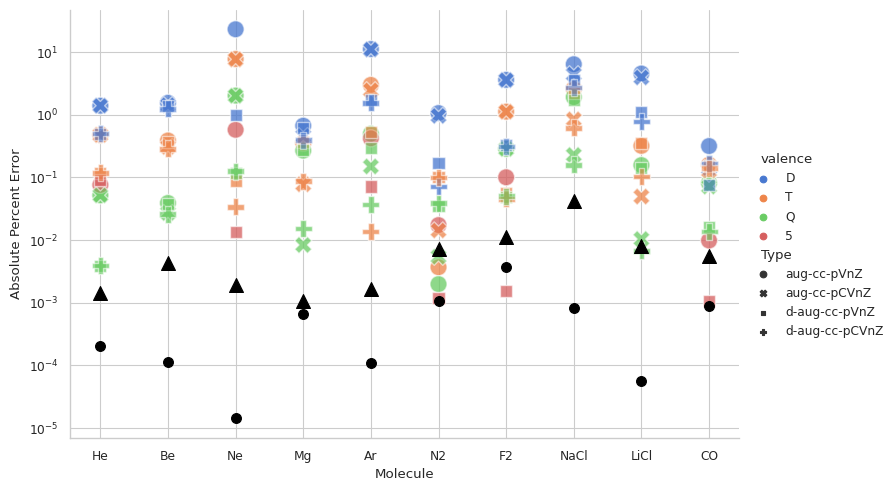

In [14]:

z_abs_error_plot=compare_z_to_basis_set(z_data,y='Absolute Percent Error')
#z_error_plot=compare_z_to_basis_set(z_data,y='Percent Error')
z_abs_error_plot.fig.savefig(paper_path.joinpath('z_abs_error.png'),dpi=600)


In [15]:
z_data.query('basis=="MRA"').sort_values('molecule')


,molecule,basis,ij,omega,alpha,FD,Percent Error,MRA Percent Error,Absolute Percent Error,MRA,Protocol
44,Ar,MRA,zz,0,10.757990,10.758002,-0.000108,-0.000108,0.000108,MRA,High
116,Ar,MRA,zz,0,10.758180,10.758002,0.001658,0.001658,0.001658,MRA,Medium
89,Be,MRA,zz,0,45.618340,45.616381,0.004295,0.004295,0.004295,MRA,Medium
17,Be,MRA,zz,0,45.616330,45.616381,-0.000112,-0.000112,0.000112,MRA,High
161,CO,MRA,zz,0,14.466040,14.466840,-0.005530,-0.005530,0.005530,MRA,Medium
89,CO,MRA,zz,0,14.466710,14.466840,-0.000899,-0.000899,0.000899,MRA,High
134,F2,MRA,zz,0,14.643870,14.642223,0.011246,0.011246,0.011246,MRA,Medium
62,F2,MRA,zz,0,14.642770,14.642223,0.003733,0.003733,0.003733,MRA,High
8,He,MRA,zz,0,1.322231,1.322234,-0.000206,-0.000206,0.000206,MRA,High
72,He,MRA,zz,0,1.322215,1.322234,-0.001417,-0.001417,0.001417,MRA,Medium
